## Business Overview

## Data Understanding

## Data Exploration and Cleaning

In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [31]:
df_ecommerce = pd.read_csv("../data/raw/data_ecommerce_customer_churn.csv")
df_ecommerce

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [32]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


### Missing Value

In [33]:
# Checking missing value
df_ecommerce.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

### Data Duplicates

In [34]:
df_ecommerce.duplicated().sum()

np.int64(671)

In [35]:
# Handling data duplicate (?) Soalnya datanya udh jelas duplicate krn ttg customer

### Data Unique (Spelling Error)

Menghitung data unik yang ada di dataframe termasuk spelling error

In [36]:
df_ecommerce.nunique()

Tenure                        36
WarehouseToHome               33
NumberOfDeviceRegistered       6
PreferedOrderCat               6
SatisfactionScore              5
MaritalStatus                  3
NumberOfAddress               14
Complain                       2
DaySinceLastOrder             22
CashbackAmount              2335
Churn                          2
dtype: int64

#### Prefered Order Cat Column

In [37]:
df_ecommerce['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

#### Marital Status

In [38]:
df_ecommerce['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Tidak ada yg miss spelling dalam "Marital Status"

### Data Anomalies

#### Distribution (Checking Outlier) for Numerical Var

##### Tenure and Churn

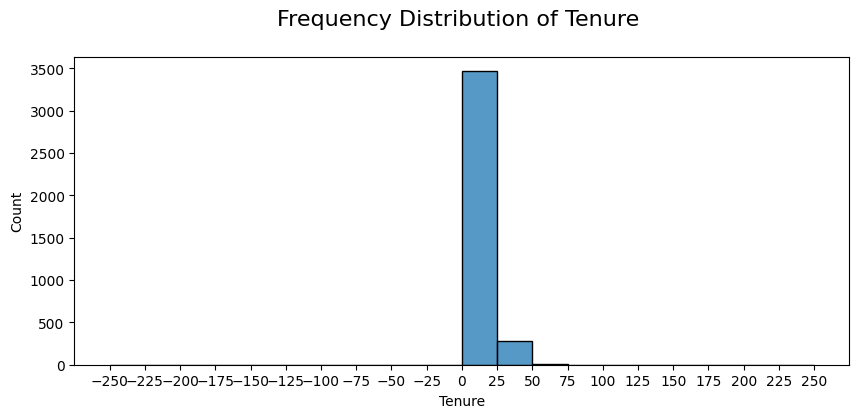

In [39]:
plt.figure(figsize=(10,4))

sns.histplot(data=df_ecommerce, x='Tenure', binrange=(-250,250), bins=20)
# binrange --> rentang bin yang ditampilkan
# bins --> jumlah bin dalam binrange

plt.title('Frequency Distribution of Tenure \n', size=16)    # title
plt.xticks(ticks=range(-250, 251, 25))                           # nilai di sumbu x

plt.show()

Distribusi cenderung miring ke kanan (positively skewed) yg mengartikan beberapa pelanggan dengan tenure yang panjang, tetapi sebagian besar pelanggan memiliki tenure yang relatif pendek.

##### Warehouse To Home and Churn

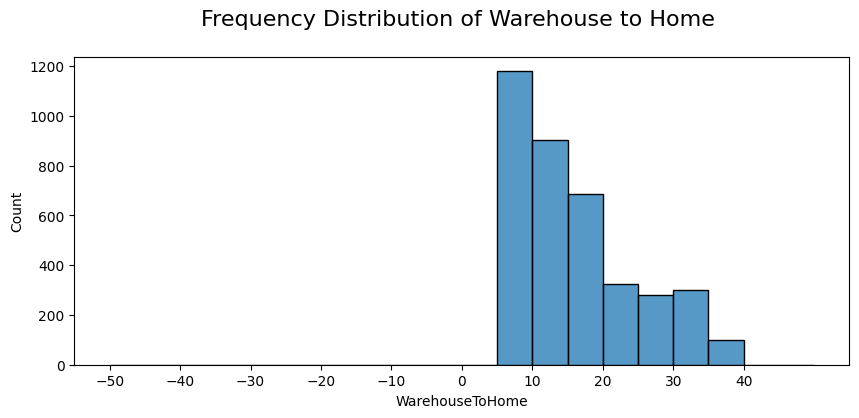

In [40]:
plt.figure(figsize=(10,4))

sns.histplot(data=df_ecommerce, x='WarehouseToHome', binrange=(-50,50), bins=20)
# binrange --> rentang bin yang ditampilkan
# bins --> jumlah bin dalam binrange

plt.title('Frequency Distribution of Warehouse to Home \n', size=16)    # title
plt.xticks(ticks=range(-50, 50, 10))                           # nilai di sumbu x

plt.show()

Distribusi cenderung miring ke kanan (positively skewed) yang menandakan mungkin ada pengiriman ke tujuan yang lebih jauh

##### Number of Address and Churn

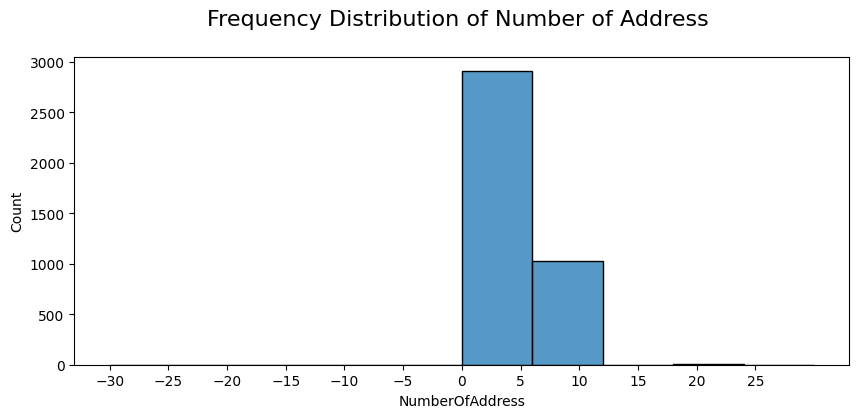

In [41]:
plt.figure(figsize=(10,4))

sns.histplot(data=df_ecommerce, x='NumberOfAddress', binrange=(-30,30), bins=10)
# binrange --> rentang bin yang ditampilkan
# bins --> jumlah bin dalam binrange

plt.title('Frequency Distribution of Number of Address \n', size=16)    # title
plt.xticks(ticks=range(-30, 30, 5))                           # nilai di sumbu x

plt.show()

Distribusi cenderung miring ke kanan (positively skewed) yang menandakan beberapa pelanggan yang jumlah alamatnya yang jauh ada banyak dibandingkan dengan rata-rata 

##### CashbackAmount and Churn

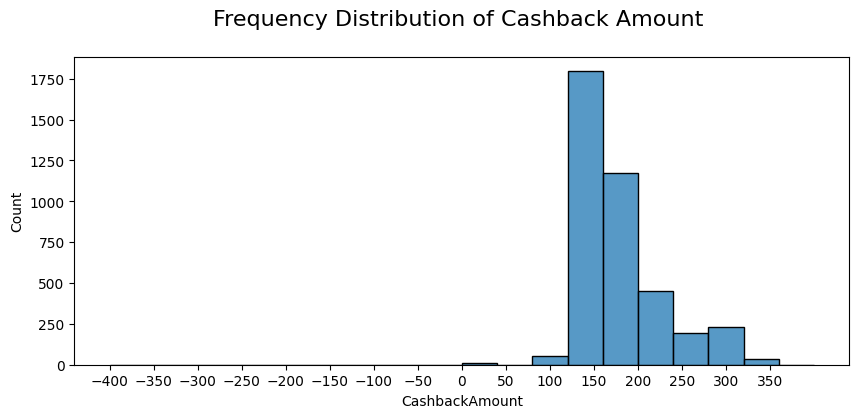

In [42]:
plt.figure(figsize=(10,4))

sns.histplot(data=df_ecommerce, x='CashbackAmount', binrange=(-400,400), bins=20)
# binrange --> rentang bin yang ditampilkan
# bins --> jumlah bin dalam binrange

plt.title('Frequency Distribution of Cashback Amount \n', size=16)    # title
plt.xticks(ticks=range(-400, 400, 50))                           # nilai di sumbu x

plt.show()

Distribusi cenderung miring ke kanan (positively skewed) yang menunjukkan beberapa transaksi dengan jumlah cashback lebih banyak dibandingkan rata-rata. 

#### Cardinality (Checking Unique Value and Cardinality) for Categorical Variables

##### Prefered Order Category

In [43]:
df_ecommerce['PreferedOrderCat'].nunique()

6

##### Satisfaction Score

In [44]:
df_ecommerce['SatisfactionScore'].nunique()

5

##### Marital Status

In [45]:
df_ecommerce['MaritalStatus'].nunique()

3

##### Day Since Last Order

In [46]:
df_ecommerce['DaySinceLastOrder'].nunique()

22

##### Complain

In [47]:
df_ecommerce['Complain'].nunique()

2

##### Churn

In [48]:
df_ecommerce['Churn'].nunique()

2

### Remove Unused Data

#### Drop NaN Value 

In [49]:
df_ecommerce

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [57]:
# Handling missing value

df_ecommerce_clean = df_ecommerce.dropna(axis=0)

df_ecommerce_clean

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


Data yang akan dihapus adalah data yang memiliki data kosong. Tapi di cek dulu distribusi datanya agar jika dicek distribusi dengan data yang sudah dihapus kuranglebih data distribusinya sama. 

#### Distribution for Numerical Feature

In [51]:
df_ecommerce.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [58]:
df_ecommerce_clean.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000
mean,10.177712,15.713819,3.698960,3.094205,4.296582,0.283507,4.780089,179.774725,0.151560
std,8.512943,8.513705,1.024092,1.381156,2.626242,0.450767,3.685837,48.293472,0.358647
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,148.420000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,4.000000,165.140000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,8.000000,191.740000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [52]:
# df_ecommerce.dropna().describe()

Nah, hasilnya kurang lebih data distribusinya sama

#### Distribution for Categorical Feature

In [53]:
df_ecommerce.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [59]:
df_ecommerce_clean.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3365,3365
unique,6,3
top,Laptop & Accessory,Married
freq,1408,1767


Data yang atas itu distribusi data yang belum di clean, data yang bawah itu distribusi data yang sebenernya kolom prefered order cat dan marital status sudah ada nilainya, tapi ikut terbersihkan karena satu baris data ada yang tidak lengkap di data selain dua tersebut. 

InsyaAllah data sudah bersih, sekarang mari di save agar tidak tertukar

### Saving data cleaned to CSV

In [60]:
df_ecommerce_clean.to_csv(r"../data/interim/data_ecommerce_customer_churn-cleaned.csv", index=False)

## Data After Cleaned

### E-Commerce Churn Cleaned

In [10]:
df_ecommerce_cleaned = pd.read_csv("../data/interim/data_ecommerce_customer_churn-cleaned.csv")

df_ecommerce_cleaned

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
4,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3360,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3361,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3362,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3363,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


### Change Data Type (Churn, Complain) to Boolean

Bertujuan agar data keluhan pelanggan / komplain dan penurunan pelanggan menjadi valid ketika di analisa. Karena implementasi datanya berupa yes dan no. 

#### Change Data Type Complain

In [5]:
df_ecommerce_cleaned['Complain'] = df_ecommerce_cleaned['Complain'].astype(bool)

#### Change Data Type Churn

In [6]:
df_ecommerce_cleaned['Churn'] = df_ecommerce_cleaned['Churn'].astype(bool)

#### Previewed Data

In [11]:
df_ecommerce_cleaned

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
4,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3360,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3361,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3362,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3363,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


## Exploration Data Analysis

### Correlation Matrix

Digunakan untuk mengetahui hubungan antara variable lain yang memungkinkan dengan churn (y) agar dapat di-kuadran yang nantinya akan mendapatkan kesimpulan hubungan sebelum dilakukan pemodelan

#### Correlation Matrix Complain (x) and Churn (y)

Setelah dibagi menjadi 4 kuadran, <br>
H0 : Pengguna yang tidak melakukan komplain (complain) berarti pengguna tersebut akan tidak meninggalkan platform tersebut (churn) <br>
H1 : Pengguna yang melakukan komplain (complain) berarti pengguna tersebut akan meninggalkan platform tersebut (churn)

In [8]:
corr_matrix_complain_churn = df_ecommerce_cleaned[['Complain', 'Churn']].corr()

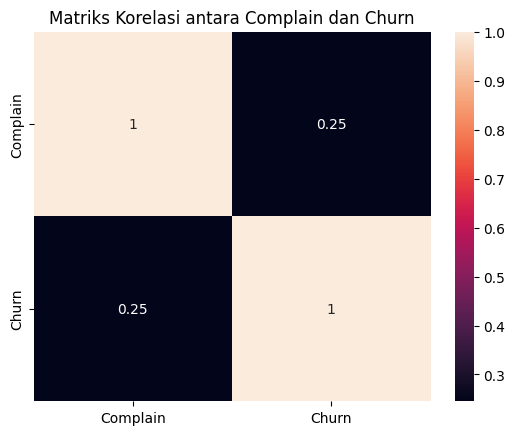

In [9]:
# Visualisasi heatmap

sns.heatmap(corr_matrix_complain_churn, annot=True)
plt.title('Matriks Korelasi antara Complain dan Churn')
plt.show()

#### Correlation Matrix Satisfaction Score (x) and Churn (y)

Setelah dibagi menjadi 4 kuadran, <br>
H0 : Pengguna yang tingkat kepuasan tinggi berarti pengguna tersebut akan tidak meninggalkan platform tersebut (churn) <br>
H1 : Pengguna yang tingkat kepuasa rendah berarti pengguna tersebut akan meninggalkan platform tersebut (churn)

In [12]:
corr_matrix_satisfaction_churn = df_ecommerce_cleaned[['SatisfactionScore', 'Churn']].corr()

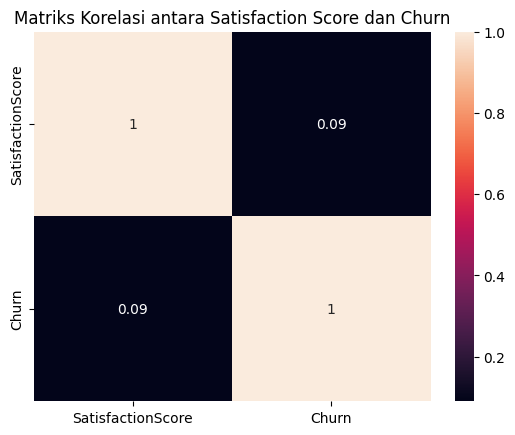

In [13]:
# Visualisasi heatmap

sns.heatmap(corr_matrix_satisfaction_churn, annot=True)
plt.title('Matriks Korelasi antara Satisfaction Score dan Churn')
plt.show()

## Data Generation

### Constructing Seen and Unseen Data

#### Seen Data

#### Unseen Data

In [56]:
from sklearn.cluster import KMeans

# memilih fitur yang relevan untuk clustering

